In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
batch_size = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(
  root = './data',
  train = True,
  download = True,
  transform = transform
  )

trainloader = torch.utils.data.DataLoader(
  trainset, batch_size = batch_size,
  shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(
  root = './data', train = False,
  download = True, transform = transform
)

testloader = torch.utils.data.DataLoader(
  testset, batch_size = batch_size,
  shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
  'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
next(iter(trainloader))

[tensor([[[[ 0.6549,  0.6706,  0.7412,  ...,  0.6078,  0.5765,  0.4824],
           [ 0.6314,  0.6471,  0.6706,  ...,  0.6157,  0.5451,  0.4980],
           [ 0.5765,  0.5686,  0.5843,  ...,  0.5765,  0.5294,  0.5373],
           ...,
           [-0.1373, -0.1294, -0.1216,  ..., -0.2157, -0.2235, -0.2314],
           [-0.1137, -0.1059, -0.1059,  ..., -0.1765, -0.1922, -0.2235],
           [-0.1451, -0.1137, -0.1137,  ..., -0.1686, -0.1843, -0.2235]],
 
          [[ 0.7725,  0.7882,  0.8275,  ...,  0.7098,  0.6471,  0.5216],
           [ 0.7412,  0.7569,  0.7647,  ...,  0.7176,  0.5686,  0.4745],
           [ 0.6941,  0.6863,  0.7020,  ...,  0.6157,  0.5059,  0.4980],
           ...,
           [-0.0510, -0.0510, -0.0431,  ..., -0.1451, -0.1529, -0.1608],
           [-0.0275, -0.0275, -0.0275,  ..., -0.1059, -0.1216, -0.1529],
           [-0.0588, -0.0275, -0.0353,  ..., -0.0980, -0.1137, -0.1529]],
 
          [[ 0.7804,  0.7882,  0.8431,  ...,  0.7647,  0.7020,  0.4510],
           [ 

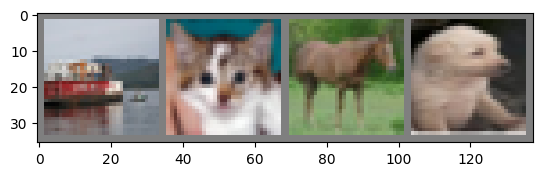

ship  cat   horse dog  


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)


imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)


class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [7]:
model = Net().to(device)

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

In [9]:
for epoch in range(2):

  running_loss = 0.0

  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    running_loss += loss.item()

    if i % 2000 == 1999:
      print(f"[{epoch + 1}, {i + 1:5d}] loss : {running_loss / 2000:.3f}")
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss : 2.241
[1,  4000] loss : 1.920
[1,  6000] loss : 1.707
[1,  8000] loss : 1.619
[1, 10000] loss : 1.539
[1, 12000] loss : 1.521
[2,  2000] loss : 1.444
[2,  4000] loss : 1.388
[2,  6000] loss : 1.360
[2,  8000] loss : 1.350
[2, 10000] loss : 1.312
[2, 12000] loss : 1.321
Finished Training


In [10]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

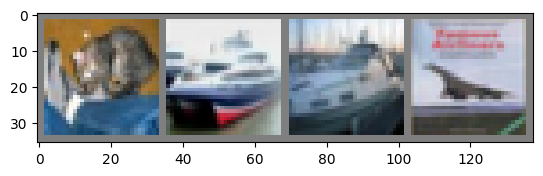

GroundTruth:  cat   ship  ship  plane


In [11]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


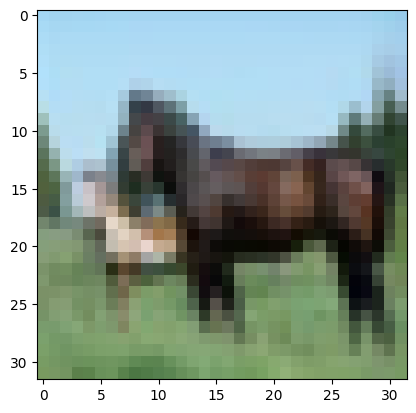

In [47]:
image = trainset[12][0].numpy().transpose(1, 2, 0) / 2 + 0.5

plt.imshow(image)
plt.show()

conv1 = nn.Conv2d(3, 6, 5)
results = conv1(trainset[12][0])

torch.Size([6, 28, 28])


/tmp/ipykernel_19740/912587491.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


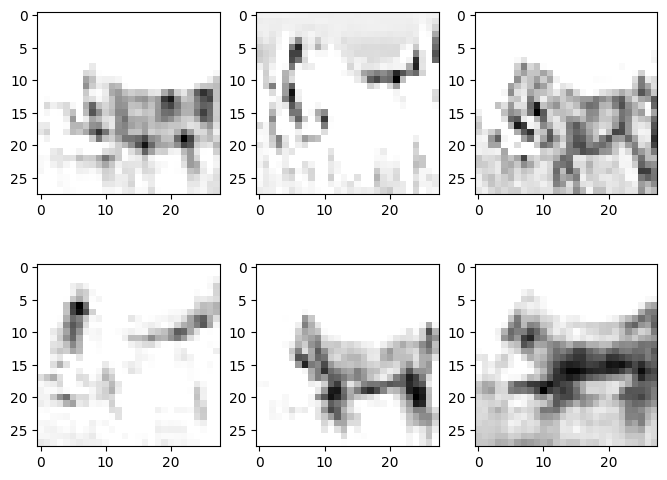

In [56]:
print(results.shape)

def show_channels(X):
  fig = plt.figure(figsize = (8, 6))

  for i in range(6):
    fig.add_subplot(2, 3, i + 1)

    plt.imshow(X[i].detach(), cmap = 'Greys')

  fig.show()

show_channels(results)

/tmp/ipykernel_19740/912587491.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


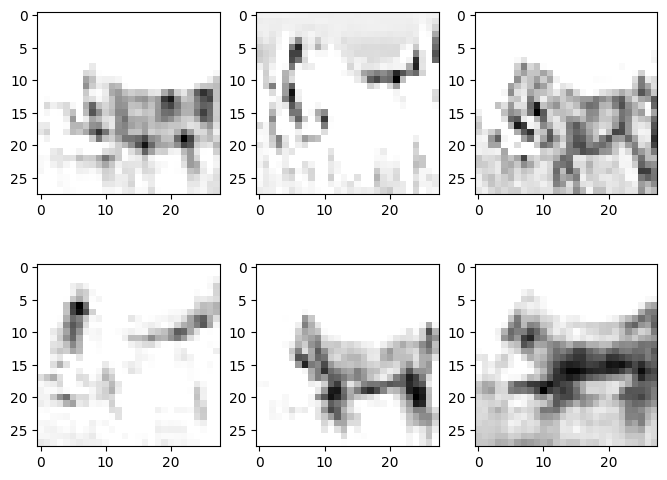

In [62]:
results = F.relu(results)

show_channels(results)

torch.Size([6, 14, 14])


/tmp/ipykernel_19740/912587491.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


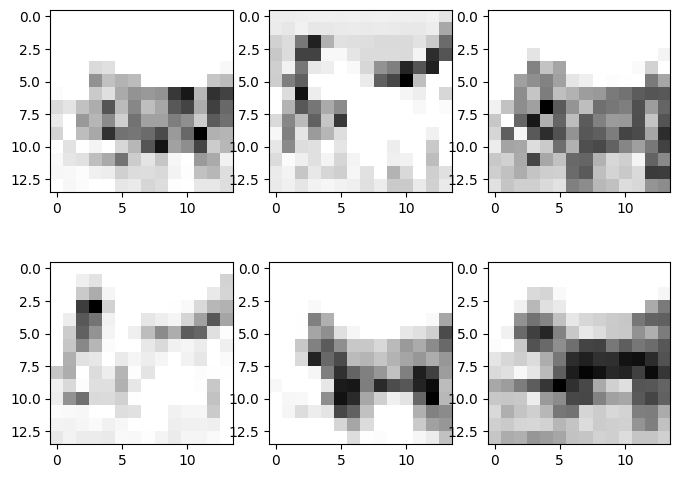

In [63]:
pool = nn.MaxPool2d(2, 2)

pooled_output = pool(results)

print(pooled_output.shape)

show_channels(pooled_output)